# Анализ закономерностей успешности игр интернет-магазина "Стримчик" 

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017-й. 

In [1]:
import pandas as pd

import numpy as np

import matplotlib as mpl

import matplotlib.pyplot as plt

import seaborn as sns

##   Обзор данных

In [2]:
data = pd.read_csv('/datasets/games.csv')

data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Дан датасет, который содержит следующую информацию:

- Name — название игры 
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Столбец Year_of_Release относится к типу данных float64, User_Score - object, что не совсем корректно.

In [4]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
pd.DataFrame(round(data.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')

,0
Critic_Score,51.300000
Rating,40.500000
User_Score,40.100000
Year_of_Release,1.600000
Name,0.000000
Genre,0.000000
Platform,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000


Почти все пропуски находятся в столбцах с оценками пользователей и экспертов. Количество пропущенных значений критическое от 40 до 50%. В столбце с годом выпуска пропущено 1,6%, ничтожное количество в столбце с жанрами. 

In [6]:
data.duplicated().sum()

0

Явные дубликаты в датасете отсутствуют.

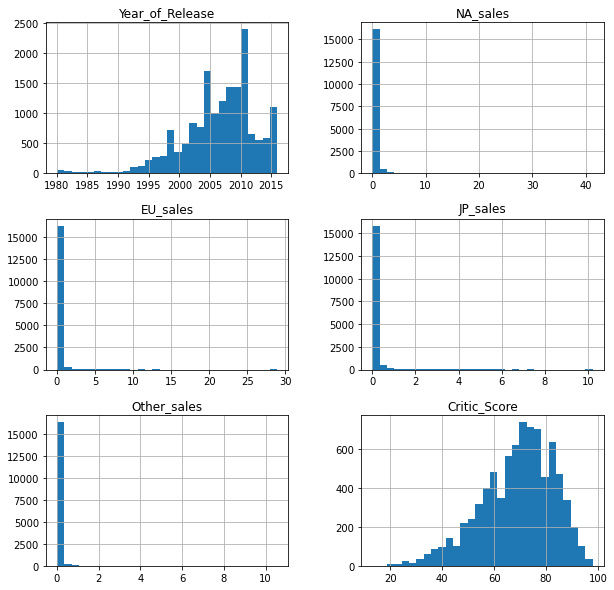

In [7]:
data.hist(figsize = (10,10), bins = 30)
plt.show()

In [8]:
# оценим столбцы с типом данных object, в которых уникальные значения часто повторяются  и могут встретиться неявные дубликаты

list = ['Platform', 'Genre', 'Rating']

for row in list:
    print('')
    print(data[row].unique())


['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


В столбцах Genre и Rating есть nan, то есть пропущенные значения, однако об этом нам стало известно ранее. Ничего необычного в представленных данных нет. На первый взгляд неявных дубликатов нет. 

Оказывется, Platforme — жанр компьютерных игр, в которых основу игрового процесса составляют прыжки по платформам, как в Марио. А то закралась мысль, что название столбца перешло в его содержимое.  

In [9]:
# оценим столбцы с оценками пользователей и экспертов, в которых могут встретиться ошибки, например, смещение точки влево.

list_two = ['Critic_Score', 'User_Score']

for row in list_two:
    print('')
    print(data[row].unique())


[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


В целом, данные корректные и соответствуют общему ряду. В столбце User_Score есть значение tbd, пока неясно, что оно означает. 

In [10]:
data.loc[data['User_Score'] == 'tbd']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Аббревиатура 'tbd' в столбце с оценкой пользователей обозначает, что рейтинг игры еще не определен. Логично, обработать это значение, заменив на nan.

**Вывод:** *представлены данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Почти все пропуски находятся в столбцах с оценками пользователей и экспертов. Количество пропущенных значений критическое от 40 до 50%. В столбце с годом выпуска пропущено 1,6%, ничтожное количество в столбце с жанрами. В целом, сами данные корректные и соответствуют общему ряду, то есть отсутствуют явные и неявные дубликаты и аномальные значения. Столбец Year_of_Release относится к типу данных float64, User_Score - object, что не совсем корректно, что следует изменить при предобработке данных. В столбце User_Score есть аббревиатура 'tbd', которая обозначает, что рейтинг игры еще не определен. Логично обработать это значение далее, заменив на nan.*

## Обработка данных

In [11]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [12]:
data.columns = data.columns.str.lower()

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [13]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


In [14]:
data = data.drop([659, 14244, 16230])

In [15]:
data[data[['name', 'platform','year_of_release']].duplicated(keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [16]:
data.dropna(subset=['year_of_release'], inplace=True)

In [17]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [18]:
data['year_of_release'] = data['year_of_release'].astype(int)

data['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16443, dtype: int64

In [19]:
# заменим значение tbd на nan

data.user_score = data.user_score.replace('tbd', np.nan)

data['user_score'].isna().sum()

8981

In [20]:
data['user_score'] = data['user_score'].astype(float)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [22]:
# посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [23]:
genre_list = data['genre'].unique()

for row in genre_list:
    print('genre:', row)
    print(round(data.loc[data['genre'] == row, ['critic_score', 'user_score' ]].isna().mean()*100,1))
    print('')
    

genre: Sports
critic_score    49.5
user_score      53.1
dtype: float64

genre: Platform
critic_score    44.2
user_score      51.7
dtype: float64

genre: Racing
critic_score    40.9
user_score      48.7
dtype: float64

genre: Role-Playing
critic_score    50.6
user_score      50.2
dtype: float64

genre: Puzzle
critic_score    61.3
user_score      78.0
dtype: float64

genre: Misc
critic_score    70.4
user_score      75.1
dtype: float64

genre: Shooter
critic_score    28.8
user_score      30.2
dtype: float64

genre: Simulation
critic_score    59.4
user_score      60.4
dtype: float64

genre: Action
critic_score    44.0
user_score      45.7
dtype: float64

genre: Fighting
critic_score    51.6
user_score      52.8
dtype: float64

genre: Adventure
critic_score    75.3
user_score      77.0
dtype: float64

genre: Strategy
critic_score    56.0
user_score      54.7
dtype: float64



**Вывод:** *Название столбцов приведены к нижнему регистру. Заменен тип данных в столбце user_score и year_of_release. Удалены неявные дубликаты, строки с пропущенными значениями в столбце year_of_release (вместе с этим ушли 2 пропуска в столбце genre). Создан столбец с суммарными продажами по всем регионам. 40.5% пропусков в столбце rating заполнить сложно, так как решение о присвоении рейтинга основывается на содержании контента, что в таблице никак не отражено. Пропусков в столбцах с оценкой критиков и пользователей 51,3% и 54.6%, соответственно, если заменить эти значения, используя категоризацию по жанрам, можно получить весомое смещение данных, так как во всех категориях, кроме Shooter, пропущено более 40%. Лучшим решением будет сохранить данные в первоначальном виде.* 

## Исследовательский анализ данных 

### Посмотрим, сколько игр выпускалось в разные годы

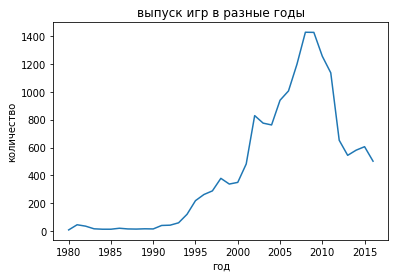

In [25]:
sns.lineplot(
    x = "year_of_release"
    , y ="name"
    , data = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').reset_index())
plt.xlabel('год')
plt.ylabel('количество')
plt.title('выпуск игр в разные годы')
plt.show()

In [26]:
data['year_of_release'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Text(0.5, 1.0, 'выпуск игр в разные годы')

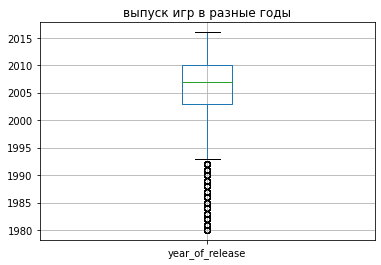

In [27]:
data.boxplot('year_of_release')
plt.title('выпуск игр в разные годы')

50% игр было выпущено в 2003-2007 гг., почти 100% - в 1993-2016 гг. Таким образом, если мы не будем учитывать игры, которые были выпущены раньше 1993 года, это не будет критично. 

### Выберем платформы с наибольшими суммарными продажами и построим распределение по годам

In [ ]:

platform_top = (
    data
    .pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum' )
    .sort_values(by = 'total_sales', ascending = False)
    .reset_index()
    .loc[:9]
)

platform_top

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


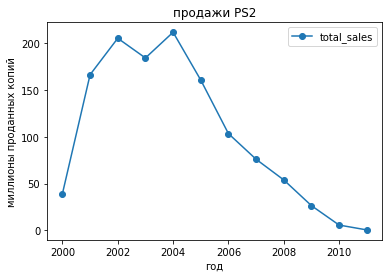

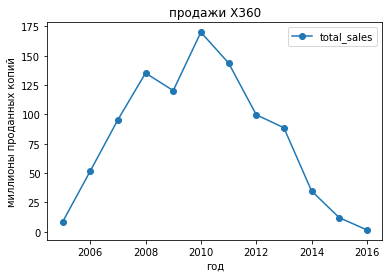

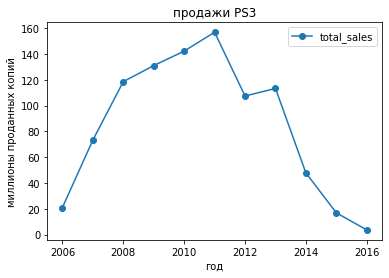

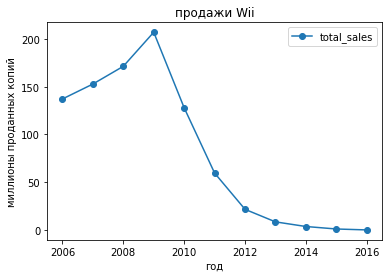

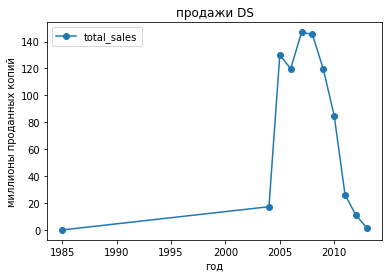

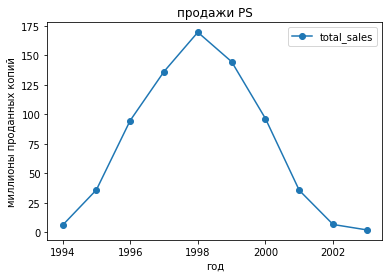

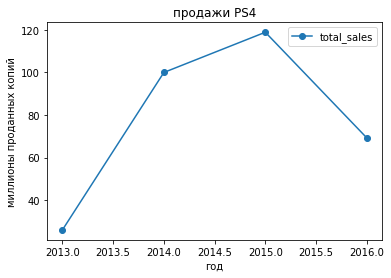

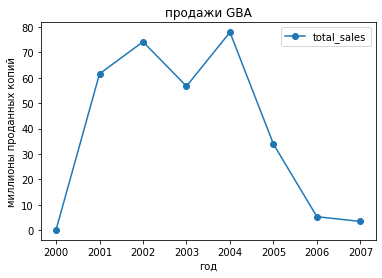

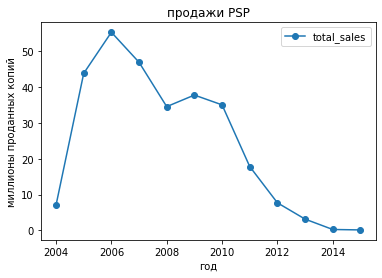

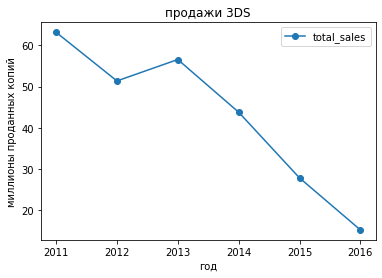

In [29]:
for row in platform_top['platform'].unique():
    (
        data.loc[data['platform'] == row]
        .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum' )
        .plot(style = 'o-')
    )
    plt.xlabel('год')
    plt.ylabel('миллионы проданных копий')
    plt.title(f'продажи {row}')
    plt.show()

In [30]:
data.query('platform == "DS" & year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Судя по информации из википедии, DS была выпущена в 2004 году, что видно по графику. Точка в 1985 согласно срезу соответствует одной единственной игре. Веротно, это ошибка при заполнении, так как есть сомнения, что платформу создали в 1985, а игры на этой платформе появились только спустя 19 лет.  

В среднем, период около 7 лет соответствует фразе "от рассвета до заката" в контексте популярности (максимальный 10 лет), за исключением некоторых платформ, например, PS. 


Актуальный период, на основании которого можно построить прогноз на 2017 год, возьмем как 2012-2016, так игры на платформах, которые появились, допустим, в 2012-2013, будут находиться на стадии снижения интереса в 2017, а в 2014-2015 - на пике

### Посмотрим, какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

In [31]:
data_prognosis = data.query('year_of_release >= 2012')

pd.DataFrame(round(data_prognosis.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')

,0
critic_score,54.600000
user_score,47.000000
rating,44.200000
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000


In [32]:
data_prognosis

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [33]:
data_prognosis_year =(
    data_prognosis
    .pivot_table(index = ['platform', 'year_of_release'] , values = 'total_sales', aggfunc = 'sum' )
    .reset_index()
)

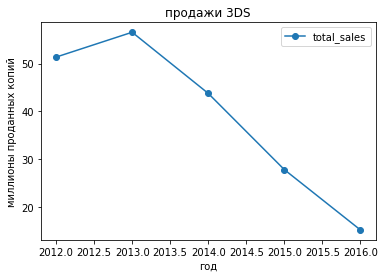

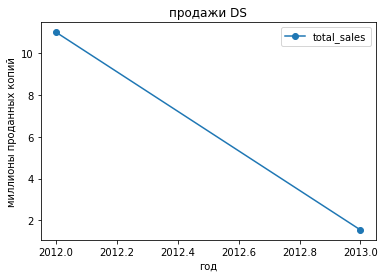

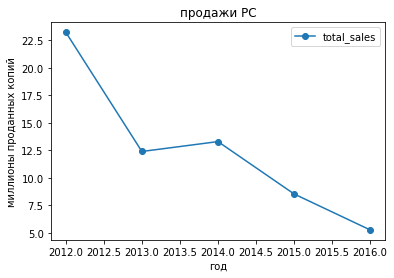

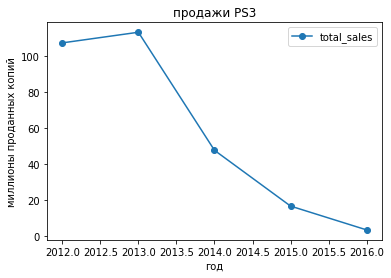

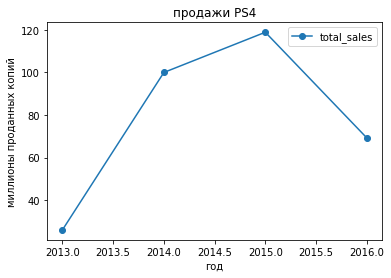

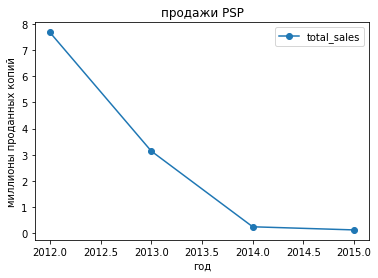

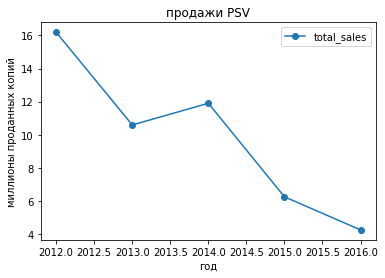

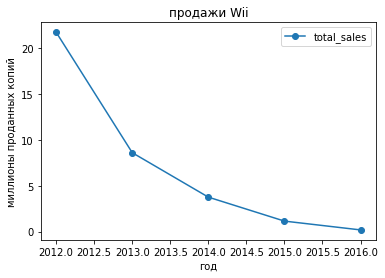

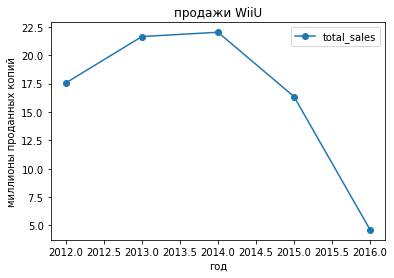

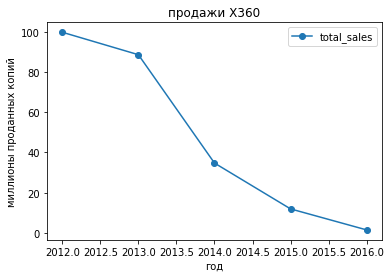

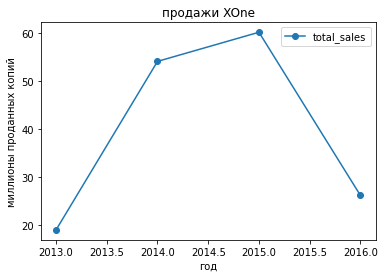

In [34]:
for row in data_prognosis_year['platform'].unique():
    (
        data_prognosis_year.loc[data_prognosis_year['platform'] == row]
        .pivot_table(index = 'year_of_release', values = 'total_sales')
        .plot(style = 'o-')
    )
    plt.xlabel('год')
    plt.ylabel('миллионы проданных копий')
    plt.title(f'продажи {row}')
    plt.show()

2012-2016 гг. представлены всего 11 платформами, для всех характерна тенденция к снижению продаж. PS4 и XOne наиболее популярные и перспективные в плане прогнозов продаж на 2017 г.  

In [35]:
platform_top

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Text(0.5, 1.0, 'глобальные продажи игр')

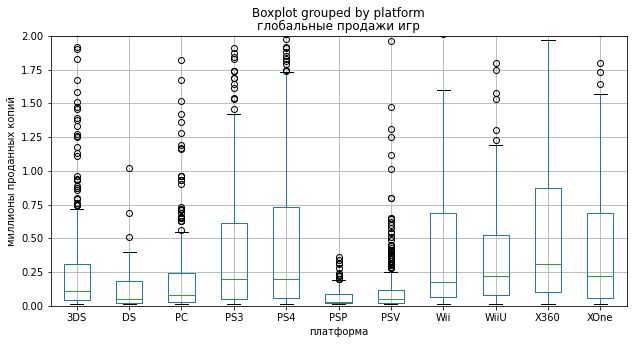

In [36]:
# построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

data_prognosis.boxplot(by = 'platform', column = 'total_sales', figsize = (10,5))
plt.ylim(0, 2)
plt.xlabel('платформа')
plt.ylabel('миллионы проданных копий')
plt.title('глобальные продажи игр')

По глобальным продажам игр в разбивке по платформам лидируют: X360, XOne, WiiU, PS3 и PS4. X360 единственная платформа, медианна которой находится выше 0,25 млн. проданных копий. В целом, для всех платформ характерна асимметрия данных: медиана смещена к нижнему концу. Самый большой разброс данных у платформ: PS3, PS4, Wii, WiiU, X360, XOne. Больше всего выбросов: 3DS, PC, PS3, PS4, PSV, XOne. Игры, выпущенные для платформ: 3DS, PS3, PS4, X360, достигали самых высоких продаж, PS3 выпустила очень популярную игру и достигла отметки больше 20 млн. проданных копий. 

### Посмотрим, как влияют на продажи внутри платформ отзывы пользователей и критиков. 

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

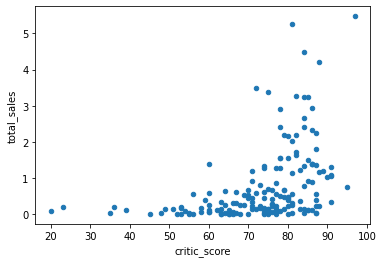

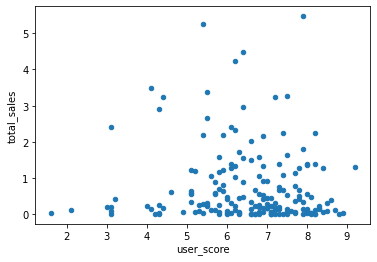

In [37]:
data_prognosis.query('platform == "XOne"').plot(x = 'critic_score', y = 'total_sales', kind = 'scatter')

data_prognosis.query('platform == "XOne"').plot(x = 'user_score', y = 'total_sales', kind = 'scatter')

In [38]:
data_prognosis.loc[data_prognosis['platform'] == 'XOne', ['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


Похоже, что отзывы пользователей совсем никак не влияют на продажи внутри платформы XOne, отзывы критиков имеют намного более четкую связь с продажами, в то же время ее нельзя назвать сильной. 

платформа PS3
              critic_score  user_score  total_sales
critic_score      1.000000    0.544510     0.334152
user_score        0.544510    1.000000    -0.006206
total_sales       0.334152   -0.006206     1.000000


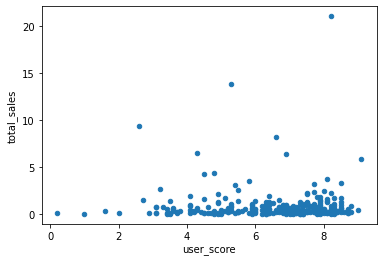

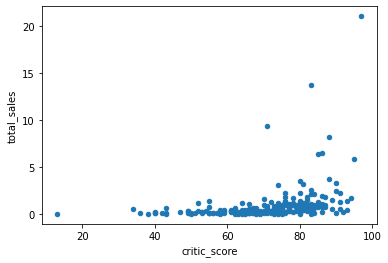


платформа X360
              critic_score  user_score  total_sales
critic_score      1.000000    0.557352     0.360573
user_score        0.557352    1.000000     0.006164
total_sales       0.360573    0.006164     1.000000


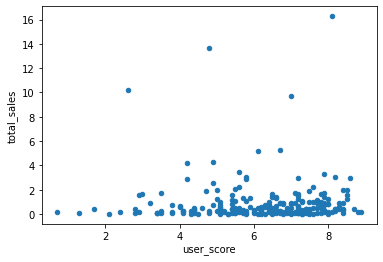

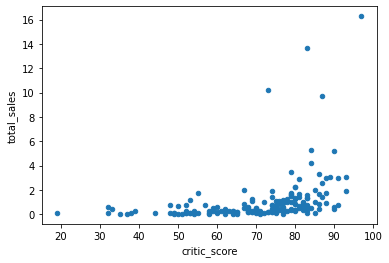


платформа PS4
              critic_score  user_score  total_sales
critic_score      1.000000    0.557654     0.406568
user_score        0.557654    1.000000    -0.031957
total_sales       0.406568   -0.031957     1.000000


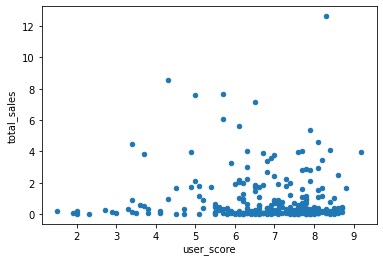

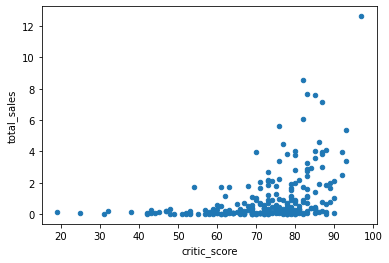


платформа WiiU
              critic_score  user_score  total_sales
critic_score       1.00000    0.770080     0.348380
user_score         0.77008    1.000000     0.400219
total_sales        0.34838    0.400219     1.000000


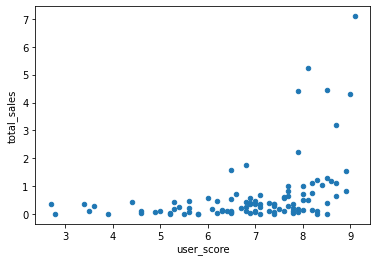

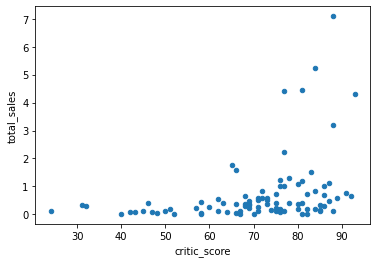


платформа 3DS
              critic_score  user_score  total_sales
critic_score      1.000000    0.722762     0.320803
user_score        0.722762    1.000000     0.197583
total_sales       0.320803    0.197583     1.000000


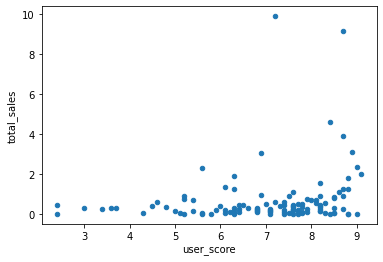

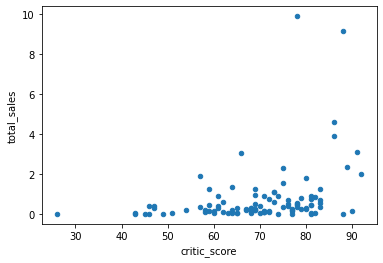

In [39]:
# cоотнесем выводы с продажами игр на других платформах.

for row in ['PS3', 'X360', 'PS4', 'WiiU', '3DS']:
    print(f'платформа {row}')
    print(data_prognosis.loc[data_prognosis['platform'] == row, ['critic_score', 'user_score', 'total_sales']].corr())
    plt.show(data_prognosis.loc[data_prognosis['platform'] == row].plot(x = 'user_score', y = 'total_sales', kind = 'scatter'))
    plt.show(data_prognosis.loc[data_prognosis['platform'] == row].plot(x = 'critic_score', y = 'total_sales', kind = 'scatter'))
    print('')

Вывод об влиянии отзывов критиков и пользователей на продажи выше соответствует другим платформам: отзывы пользователей совсем никак не влияют на продажи внутри половины платформ, другая половина, где можно ометить слабую связь, родом из Японии, вероятно, это и является причиной различий (культурные особенности). Отзывы критиков имеют намного более четкую связь с продажами и повсеместно, в то же время ее нельзя назвать сильной.

### Посмотрим на общее распределение игр по жанрам. 

<AxesSubplot:title={'center':'общее распределение игр по жанрам 2012-2016 гг'}>

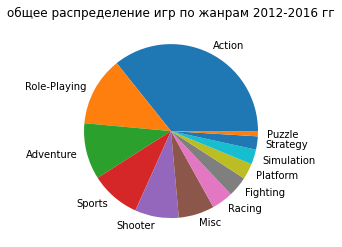

In [40]:
data_prognosis.value_counts('genre').plot(kind = 'pie', ylabel='', title = 'общее распределение игр по жанрам 2012-2016 гг')

Text(0.5, 1.0, 'распределение продаж игр по жанрам')

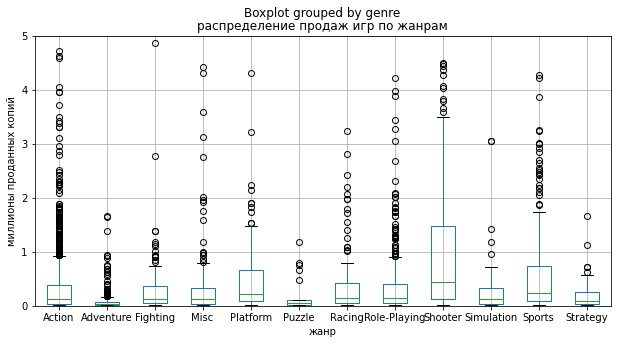

In [41]:
data_prognosis.boxplot(by = 'genre', column = 'total_sales', figsize = (10,5))
plt.ylim(0,5)
plt.xlabel('жанр')
plt.ylabel('миллионы проданных копий')
plt.title('распределение продаж игр по жанрам')

К самым прибыльным жанрам относятся: shooter, sports, platform (они же имеют самый большой разброс данных). К жанрам с низкими продажами: adventure и puzzle. Другие жанры почти сопоставимы между собой. Больше всего выбросов: action, role-playing, adventure, sports. Игры, выпущенные в жанре: action, role-playing и shooter, достигали самых высоких продаж; в жанре action самая популярная игра достигла отметки больше 15 млн. проданных копий.

**Вывод:** *50% игр было выпущено в 2003-2007 гг., почти 100% - в 1993-2016 гг. В среднем, период около 6-7 лет соответствует фразе "от рассвета до заката" в контексте популярности конкретных платформ (максимальный 10 лет), за исключением, пожалуй, только платформы PS с длительной историей.*

*Ссылаясь на сказанное выше, актуальный период, на основании которого можно построить прогноз на 2017 год, был взят как 2012-2016. Так платформы, которые появились, допустим, в 2012-2013, будут, предположительно, находиться на стадии снижения интереса в 2017, а в 2014-2015 - на пике. Таким образом, 2012-2016 гг. представлены всего 11 платформами и для всех характерна тенденция к снижению продаж. PS4 и XOne наиболее популярные и перспективные в плане прогнозов продаж на 2017 г.* 

*По глобальным продажам игр в разбивке по платформам лидируют: X360, XOne, WiiU, PS3 и PS4. X360 единственная платформа, медианна которой находится выше 0,25 млн. проданных копий. Больше всего выбросов, а значит очень популярные игры были выпущены на платформах: 3DS, PC, PS3, PS4, PSV, XOne, а 3DS, PS3, PS4, X360 достигали самых высоких продаж, PS3 выпустила самую популярную игру, которая достигла отметки больше 20 млн. проданных копий.*

*Похоже, что отзывы пользователей совсем никак не влияют на продажи внутри платформы XOne, отзывы критиков имеют намного более четкую связь с продажами, в то же время ее нельзя назвать сильной, данный вывод об влиянии отзывов критиков и пользователей на продажи соответствует другим платформам. Однако для платформ родом из Японии отзывы пользователей имеют слабую связь с продажами, вероятно, это и является причиной различий (культурные особенности). Отзывы критиков имеют намного более четкую связь с продажами и повсеместно, в то же время ее нельзя назвать сильной.*

*К самым прибыльным жанрам относятся: shooter, sports, platform. К жанрам с низкими продажами: adventure и puzzle. Другие жанры почти сопоставимы между собой. Больше всего выбросов, а значит очень популярные игры были выпущены в жанрах: action, role-playing, adventure, sports. Игры, выпущенные в жанре: action, role-playing и shooter достигали самых высоких продаж, в жанре action выпущена самая популярная игра, которая достигла отметки больше 15 млн. проданных копий.*

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5);
- Самые популярные жанры (топ-5);
- Как влияет ли рейтинг ESRB на продажи в отдельном регионе.

<AxesSubplot:title={'center':'самые популярные платформы в США'}, xlabel='платформа', ylabel='миллионы проданных копий'>

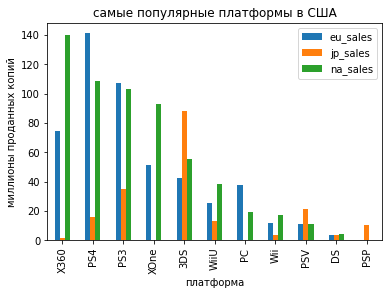

In [42]:
(
    data_prognosis
    .pivot_table(index = ['platform'], values = ['na_sales', 'eu_sales', 'jp_sales'] , aggfunc = 'sum')
    .sort_values(by = ['na_sales', 'eu_sales', 'jp_sales'], ascending = False)
    .plot(kind = 'bar', xlabel='платформа', ylabel = 'миллионы проданных копий', title = 'самые популярные платформы в США')
)

### Найдем самые популярные платформы (топ-5)

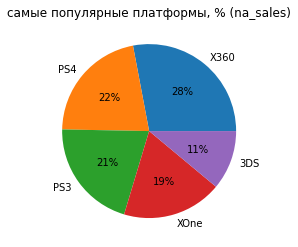

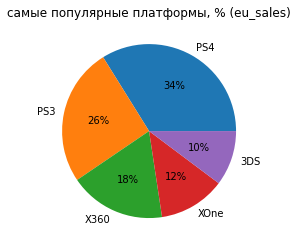

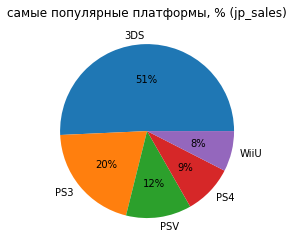

In [43]:
for row in ['na_sales', 'eu_sales', 'jp_sales']:
    (
        data_prognosis
        .pivot_table(index = ['platform'], values = row, aggfunc = 'sum')
        .sort_values(by = row, ascending = False)
        .head(5)
        .plot
        (
            kind = 'pie'
            , y = row
            , ylabel=''
            , title = f'самые популярные платформы, % ({row})'
            , autopct='%1.0f%%'
            , legend = False
        )
    )

            
#plt.yticks(rotation=90)

Самые популярные платформы в Северной Америке: 
- X360, PS4, PS3, XOne, 3DS; 
- X360, PS4, PS3 занимают 81%, по 28%, 22% и 21%, соответственно. 

Самые популярные платформы в Европе: 
- PS4, PS3, X360, XOne, 3DS; 
- PS4, PS3, X360 занимают 78%, по 34%, 26% и 18%, соответственно. 

Самые популярные платформы в Японии: 
- 3DS, PS3, PSV, PS4, WiiU; 
- 3DS, PS3, PSV занимают 83%, по 51%, 20% и 12%, соответственно. 


На платформы X360, PS4, PS3 в Европе и Северной Америке приходится около 80% продаж. Рынок Японии более специфичный: эту же долю занимают платформы 3DS, PS3, PSV, где PS3 занимает всего 20%.

### Найдем cамые популярные жанры (топ-5). 


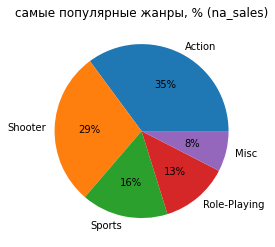

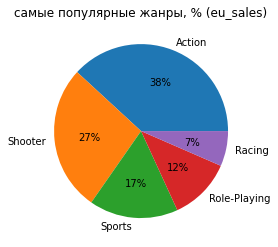

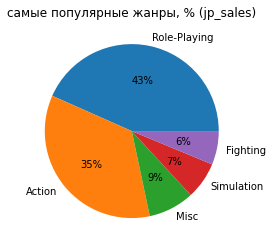

In [44]:
for row in ['na_sales', 'eu_sales', 'jp_sales']:
    (
        data_prognosis
        .pivot_table(index = ['genre'], values = row, aggfunc = 'sum')
        .sort_values(by = row, ascending = False)
        .head(5)
        .plot
        (
            kind = 'pie'
            , y = row
            , ylabel=''
            , title = f'самые популярные жанры, % ({row})'
            , autopct='%1.0f%%'
            , legend = False
        )
    )


Самые популярные жанры в Северной Америке: 
- Action, Shooter, Sports, Role-Playing, Misc;
- Action, Shooter, Sports занимают 80%, по 35%, 29% и 16%, соответственно. 

Самые популярные жанры в Европе: 
- Action, Shooter, Sports, Role-Playing, Racing;
- Action, Shooter, Sports занимают 82%, по 38%, 27% и 17%, соответственно. 

Самые популярные жанры в Японии: 
- Role-Playing, Action, Misc, Simulation, Fighting
- Role-Playing, Action, Misс занимают 87%, по 43%, 35% и 9%, соответственно. 


На жанры Action, Shooter, Sports в Европе и Северной Америке приходится около 80% продаж. Рынок Японии вновь более специфичный: 87% занимают платформы Role-Playing, Action, Misс, где Action занимает 35%.

### Узнаем, влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [45]:
data_prognosis['rating'].unique()

array(['M', nan, 'E', 'E10+', 'T'], dtype=object)

In [46]:
data_prognosis['rating'] = data_prognosis['rating'].fillna('unknown')

data_prognosis['rating'].unique()

/tmp/ipykernel_136/1761918114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prognosis['rating'] = data_prognosis['rating'].fillna('unknown')


array(['M', 'unknown', 'E', 'E10+', 'T'], dtype=object)

In [47]:
def rating_number(rating):
    if rating == 'M':
        return 1
    elif rating == 'E':
        return 2
    elif rating == 'E10+':
        return 3
    elif rating == 'T':
        return 4
    elif rating == 'unknown':
        return 5
        

data_prognosis['rating_number'] = data_prognosis['rating'].apply(rating_number)

/tmp/ipykernel_136/150865258.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prognosis['rating_number'] = data_prognosis['rating'].apply(rating_number)


In [48]:
data_prognosis.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,rating_number
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,1
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,1
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63,5
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60,5
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79,1
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68,1
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,1
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68,5
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24,1
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90,2


<AxesSubplot:xlabel='rating_number', ylabel='na_sales'>

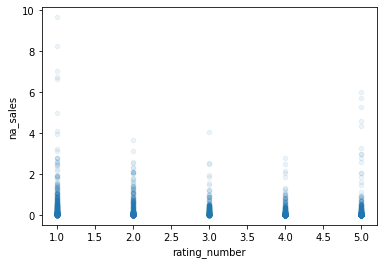

In [49]:
data_prognosis.plot(x = 'rating_number', y = 'na_sales', kind = 'scatter', alpha = 0.08)

In [50]:
data_prognosis.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales,rating_number
year_of_release,1.000000,-0.093050,-0.053335,-0.063739,-0.057549,0.015811,-0.020654,-0.083702,0.051514
na_sales,-0.093050,1.000000,0.767474,0.270985,0.792269,0.290652,-0.014446,0.920977,-0.245438
eu_sales,-0.053335,0.767474,1.000000,0.265111,0.936904,0.283629,-0.022248,0.927484,-0.237586
jp_sales,-0.063739,0.270985,0.265111,1.000000,0.203053,0.116816,0.163880,0.450343,0.062487
other_sales,-0.057549,0.792269,0.936904,0.203053,1.000000,0.272873,-0.011111,0.909521,-0.230459
critic_score,0.015811,0.290652,0.283629,0.116816,0.272873,1.000000,0.518573,0.308633,-0.039649
user_score,-0.020654,-0.014446,-0.022248,0.163880,-0.011111,0.518573,1.000000,0.004194,0.110400
total_sales,-0.083702,0.920977,0.927484,0.450343,0.909521,0.308633,0.004194,1.000000,-0.225753
rating_number,0.051514,-0.245438,-0.237586,0.062487,-0.230459,-0.039649,0.110400,-0.225753,1.000000


Рейтинг ESRB имеет очень слабую отрицательную связь с продажами в Европе и Северной Америке, и не имеет никакой связи в Японии.

**Вывод:** *Самые популярные платформы в Северной Америке: X360, PS4, PS3, XOne, 3DS; в Европе: PS4, PS3, X360, XOne, 3DS; в Японии: 3DS, PS3, PSV, PS4, WiiU.* 

*На платформы X360, PS4, PS3 в Европе и Северной Америке приходится 81% и 78% продаж. Рынок Японии более специфичный: 83% занимают платформы 3DS, PS3, PSV, где PS3 занимает всего 20%.*

*Самые популярные жанры в Северной Америке: Action, Shooter, Sports, Role-Playing, Misc; в Европе: Action, Shooter, Sports, Role-Playing, Misc; в Японии: Role-Playing, Action, Misc, Simulation, Fighting.*

*На жанры Action, Shooter, Sports в Европе и Северной Америке приходится 80%  и 82% продаж. Рынок Японии вновь более специфичный: 87% занимают платформы Role-Playing, Action, Misс, где Action занимает 35%.*

*Рейтинг ESRB имеет очень слабую отрицательную связь с продажами в Европе и Северной Америке, и не имеет никакой связи в Японии.*

## Проверка гипотез

Для проверки гипотез можно применить t-тест, так как соблюдены три условия:

- Генеральные совокупности не зависят друг от друга. 

- Выборочные средние нормально распределены. 

- Дисперсии рассматриваемых генеральных совокупностей равны (веротнее всего; + "симуляции, проведённые учёными, показывают, что даже если дисперсии на самом деле не равны, то тест редко ошибается")

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [51]:
data_prognosis.loc[data_prognosis['platform'] == 'XOne']['user_score'].mean()

6.521428571428572

In [52]:
data_prognosis.loc[data_prognosis['platform'] == 'PC']['user_score'].mean()

6.428640776699029

In [53]:
from scipy import stats as st

alpha = 0.05 # уровень статистической значимости, если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(
    data_prognosis.loc[data_prognosis['platform'] == 'XOne']['user_score']
    , data_prognosis.loc[data_prognosis['platform'] == 'PC']['user_score']
    , nan_policy = 'omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')  

p-значение: 0.5535080500643738
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value (0.5535080500643738) больше заданного уровня значимости, поэтому нельзя отвергнуть нулевую гипотезу. Есть основания говорить, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: cредние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза: cредние пользовательские рейтинги жанров Action и Sports различаются.

In [54]:
data_prognosis.loc[data_prognosis['genre'] == 'Action']['user_score'].mean()

6.825047801147227

In [55]:
data_prognosis.loc[data_prognosis['genre'] == 'Sports']['user_score'].mean()

5.455670103092784

In [56]:
alpha = 0.05 # уровень статистической значимости, если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(
    data_prognosis.loc[data_prognosis['genre'] == 'Action']['user_score']
    , data_prognosis.loc[data_prognosis['genre'] == 'Sports']['user_score']
    , nan_policy = 'omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')  

p-значение: 4.8045233804629176e-26
Отвергаем нулевую гипотезу


Полученное значение p-value (4.8045233804629176e-26) меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что cредние пользовательские рейтинги жанров Action и Sports разные.

**Выводы:** *Есть основания говорить, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Есть основания говорить, что cредние пользовательские рейтинги жанров Action и Sports разные.*

## Общий вывод

Из открытых источников доступны исторические данные об играх. Представлены данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. В столбцах с оценками пользователей и экспертов содержится 40-50% пропусков, 1,6% - с годом выпуска. Явные дубликаты и аномальные значения не обнаружены. 

Название столбцов приведены к нижнему регистру. Заменен тип данных в столбце user_score и year_of_release. Удалены неявные дубликаты, строки с пропущенными значениями в столбце year_of_release, genre. Создан столбец с суммарными продажами по всем регионам. 

Пропуски в столбцах: возрастной рейтинг, с оценкой критиков и пользователей сохранены, так как рейтинг заполнить сложно (необходимо понимать содержание контента, что в таблице никак не отражено), замена пропусков в столбцах с оценкой критиков и пользователей средним или медианным значением дала бы весомое смещение данных. Однако, учитывая, что в каждом жанре было пропущено примерно одинаковое количество значений, можно говорить об отсутствии значимой проблемы. 

50% игр было выпущено в 2003-2007 гг., почти 100% - в 1993-2016 гг. В среднем, период около 6-7 лет соответствует фразе "от рассвета до заката" в контексте популярности игр для конкретных платформ (максимальный срок 10 лет).

В связи со сказанным выше за актуальный период, на основании которого можно было бы построить прогноз на 2017 год, был взят период 2012-2016. Данный период  представлен всего 11-ю платформами и для всех характерна тенденция к снижению продаж. PS4 и XOne наиболее популярные и перспективные в плане прогнозов продаж на 2017 г. По глобальным продажам игр в разбивке по платформам лидируют: X360, XOne, WiiU, PS3 и PS4. Очень популярные игры были выпущены на платформах: 3DS, PC, PS3, PS4, PSV, XOne, а на 3DS, PS3, PS4, X360 были самые высокие продажи, PS3 выпустила самую популярную игру, которая достигла отметки больше 20 млн. проданных копий.

Отзывы пользователей совсем никак не влияют на продажи внутри платформ, исключение - игры для платформ родом из Японии, где отмечается слабая связь с продажами (вероятно, это и является причиной различий (культурные особенности), отзывы критиков имеют намного более четкую связь с продажами и повсеместно, в то же время ее нельзя назвать сильной.

К самым прибыльным жанрам относятся: shooter, sports, platform. К жанрам с низкими продажами: adventure и puzzle. Другие жанры почти сопоставимы между собой. Самые популярные игры были выпущены в жанрах: action, role-playing, adventure, sports. Игры, выпущенные в жанре: action, role-playing и shooter достигали самых высоких продаж, в жанре action выпущена самая популярная игра, которая достигла отметки больше 15 млн. проданных копий.

Самые популярные платформы в Северной Америке: X360, PS4, PS3, XOne, 3DS; в Европе: PS4, PS3, X360, XOne, 3DS; в Японии: 3DS, PS3, PSV, PS4, WiiU. На платформы X360, PS4, PS3 в Европе и Северной Америке приходится 81% и 78% продаж. Рынок Японии более специфичный: 83% занимают платформы 3DS, PS3, PSV, где PS3 занимает всего 20%.

Самые популярные жанры в Северной Америке: Action, Shooter, Sports, Role-Playing, Misc; в Европе: Action, Shooter, Sports, Role-Playing, Misc; в Японии: Role-Playing, Action, Misc, Simulation, Fighting.На жанры Action, Shooter, Sports в Европе и Северной Америке приходится 80% и 82% продаж. Рынок Японии вновь более специфичный: 87% занимают платформы Role-Playing, Action, Misс, где Action занимает 35%.

Рейтинг ESRB имеет очень слабую отрицательную связь с продажами в Европе и Северной Америке и не имеет никакой связи в Японии.
По результатам проверки гипотез есть основания говорить, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, что средние пользовательские рейтинги жанров Action и Sports различаются.

Таким образом, платформа, год выпуска, жанр игры и территория реализации определяют успешность игры. Среди платформ на рынке в Европе и Северной Америке внимание стоит уделить: X360, PS4, PS3; на рынке Японии: 3DS, PS3, PSV. Год выпуска игры не должен составлять более 5 лет. Самые популярные жанры в Северной Америке и Европе: Action, Shooter, Sports, Role-Playing, Misс и Racing; в Японии: Role-Playing, Action, Misc, Simulation, Fighting. На жанры Action, Shooter, Sports в Европе и Северной Америке приходится 80% и 82% продаж. Рынок Японии вновь более специфичный: 87% занимают платформы Role-Playing, Action, Misс, где Action занимает 35%. Как следует из информации выше прогнозы должны учитывать территорию, так факторы, определяющие успешность игры в Северной Америке и Европе не будут равнозначны факторам в Японии. Оценки критиков и пользователей, рейтинг от организации ESRB, вопреки интуитивному мнению, не вносят значимый вклад в объем продаж. 

В целом, данные реалистичные. Значительное количество пропусков в столбцах с оценками и рейтингом могло исказить результат, однако пропуски распределены одинаково по категориям, поэтому можно ожидать отсутствие значимого смещения результатов. Не было обнаружена зависимость пропусков от жанра, года или стран реализации, поэтому сложно дать рекомендации по сбору данных. Вероятно, данные были собраны адекватно, возможно, стоит в будущем расширить источники, содержащие данные об оценках игры. Возрастной рейтинг может быть заполнен в перспективе, так как около 2 тыс. значений имели аббревиатуру "tbd" и в ближайшее время могут получить рейтинг, что может быть внесено в таблицу для повторного анализа.
